<a href="https://colab.research.google.com/github/MN-21/1/blob/main/p11_PCA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
import os
import math
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')

In [ ]:
np.random.seed(21)

In [ ]:
iris=load_iris()

iris.data.shape, iris.target.shape

((150, 4), (150,))

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
data=pd.DataFrame(iris.data, columns=iris.feature_names)
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


DataFrame.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**PCA**(principal component analysis )

sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

 this class does not support sparse input. See TruncatedSVD for an alternative with sparse data.

whiten

When True (False by default) ensure uncorrelated outputs with unit component-wise variances.

Whitening will remove some information from the transformed signal (the relative variance scales of the components) but can sometime improve the predictive accuracy of the downstream estimators by making their data respect some hard-wired assumptions.

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit_transform(data)

pca.n_components_, pca.explained_variance_ratio_

(2, array([0.92461872, 0.05306648]))

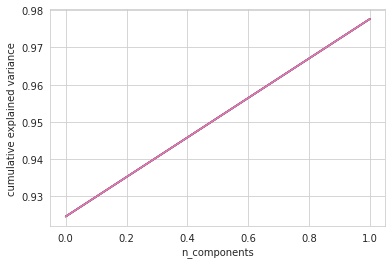

In [ ]:
for i in range(1,8):
  pca=PCA(n_components=2)
  pca.fit_transform(data)
  plt.plot(np.cumsum(pca.explained_variance_ratio_))
  plt.xlabel('n_components')
  plt.ylabel('cumulative explained variance')
  #plt.grid()

sklearn.cluster.**KMeans**(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

inertia

Sum of squared distances of samples to their closest cluster center.

In [ ]:
df=pca.fit_transform(data)

In [ ]:
df.shape

(150, 2)

In [ ]:
df[0]

array([-2.68412563,  0.31939725])

**Elbow Method**

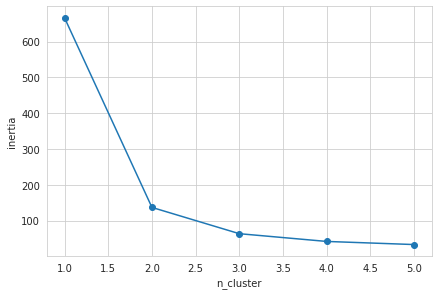

In [ ]:
from sklearn.cluster import KMeans

inertia=[]
for i in range(1,6):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)
plt.plot(range(1,6), inertia, marker='o')
plt.tight_layout()
plt.xlabel('n_cluster')
plt.ylabel('inertia');

k=2 or k=3 or k=4

**Silhouette_Score**

sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1

Compute the mean Silhouette Coefficient of all samples.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

Text(0, 0.5, 'silhouette_score')

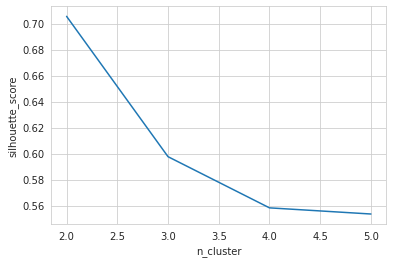

In [ ]:
sse=[]
for i in range(2,6):
  kmeans=KMeans(n_clusters=i)
  label=kmeans.fit_predict(df)
  sse.append(silhouette_score(df, label))
plt.plot(range(2,6), sse)
plt.xlabel('n_cluster')
plt.ylabel('silhouette_score')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


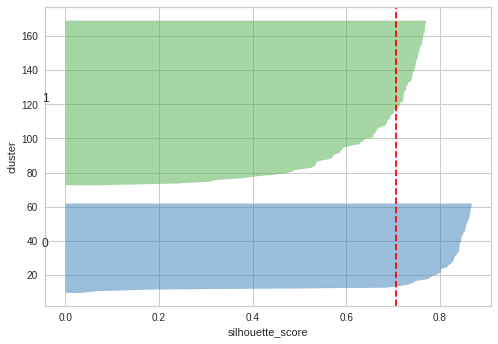

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(2)
SilhouetteVisualizer(kmeans,colors='yellowbrick').fit(df)
plt.xlabel('silhouette_score')
plt.ylabel('cluster');

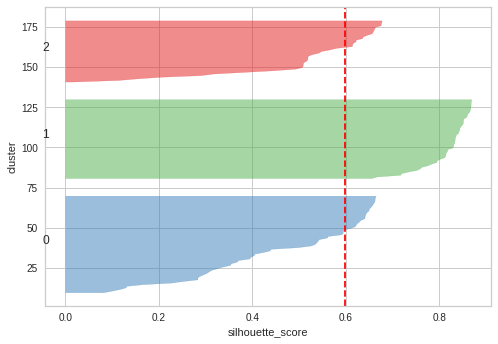

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(3)
SilhouetteVisualizer(kmeans,colors='yellowbrick').fit(df)
plt.xlabel('silhouette_score')
plt.ylabel('cluster');

The vertical dashed lines represent the silhouette score for each number of clusters.

When most of the instances in a cluster have a lower coefficient than this score 
(i.e., if
many of the instances stop short of the dashed line, ending to the left of it), then the
cluster is rather bad since this means its instances are much too close to other clusters.

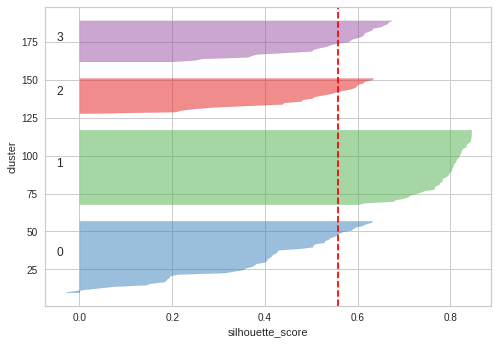

In [ ]:
kmeans = KMeans(4)
SilhouetteVisualizer(kmeans,colors='yellowbrick').fit(df)
plt.xlabel('silhouette_score')
plt.ylabel('cluster');

when k=2 or k=3, the clusters look pretty good – most instances extend beyond the dashed line, to
the right and closer to 1.0

In [ ]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2)
kmeans.fit_transform(df)
label=kmeans.fit_predict(df) #or label=kmeans.predict(df)

n_labels=np.unique(label)
n_labels

array([0, 1], dtype=int32)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_[0]

array([ 1.38640101, -0.06980433])

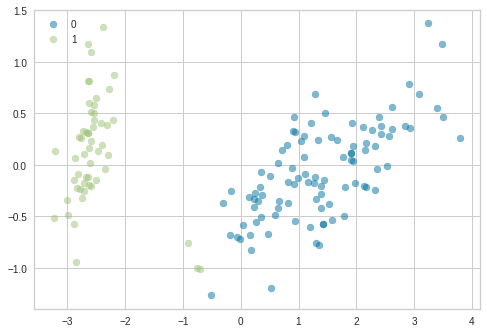

In [ ]:
for i in n_labels:
  plt.scatter(x=df[label==i,0], y=df[label==i,1], label=i, alpha=0.5)
plt.legend()
#plt.grid();